# Q1

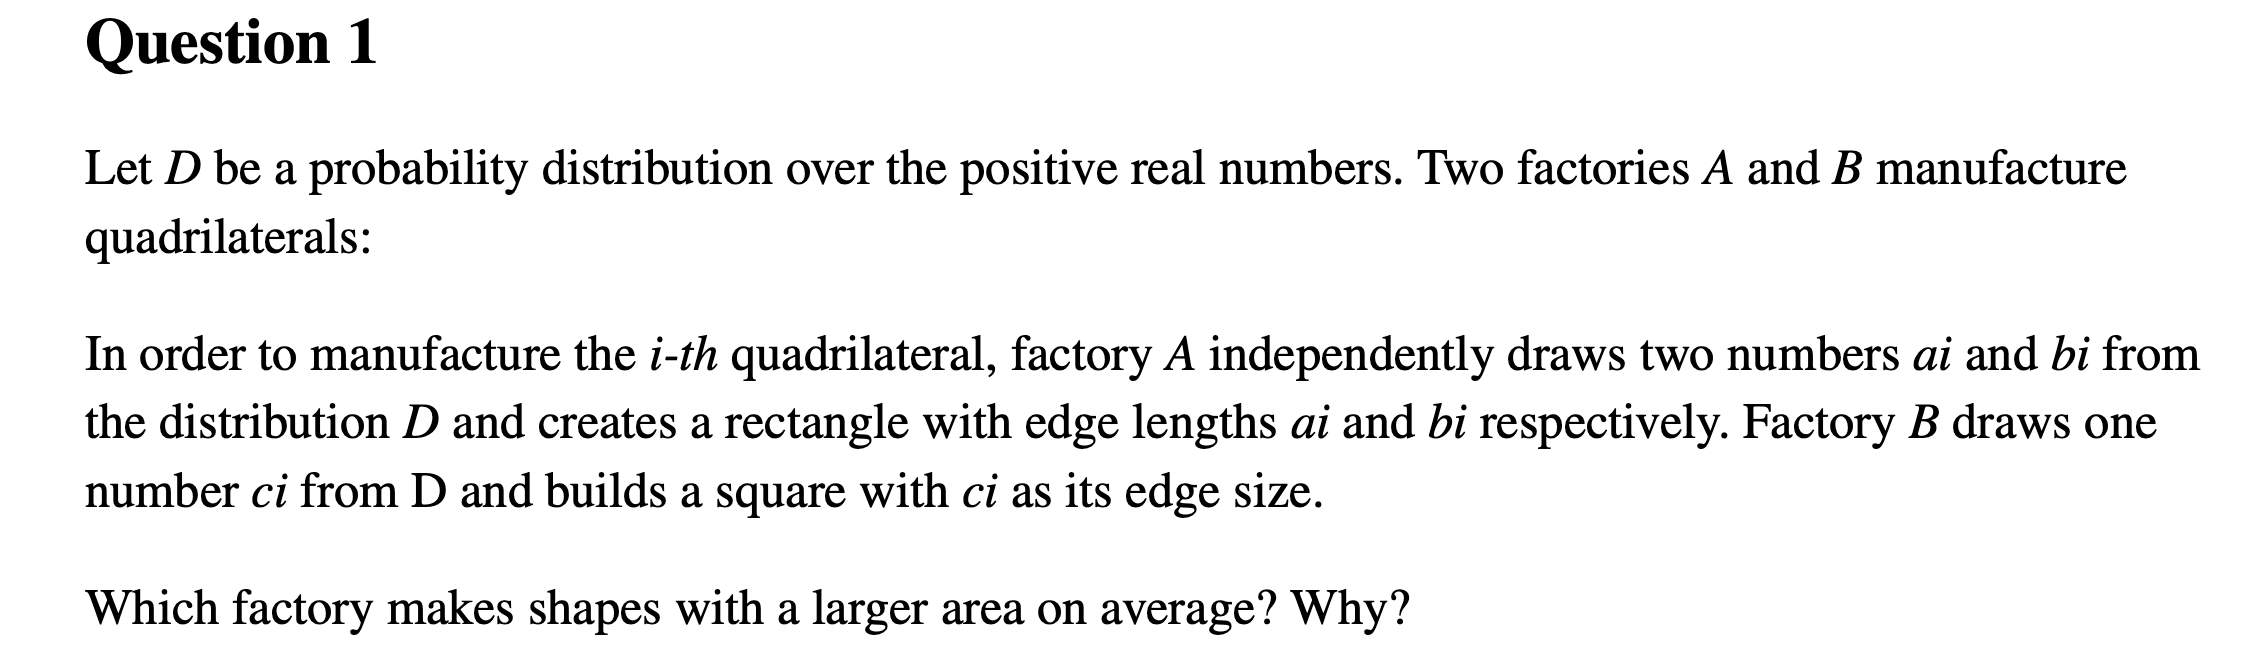

1. What is the `D` probability distribution?
    - Normal
    - Uniform
2. What is the definition of probability distribution over the positive real numbers.

Positive real number interval: $(0, \inf)$

## Problem Statement

Given probability distribution $D$ is over the positive real numbers. We know the interval is between $(0, \infty)$.

Given two factories $A$ and $B$ to manufacture quadrilaterals.

$A$ draws two numbers $ai$ and $bi$ from the distribution $D$ and creates a rectangle with shape=$ai * bi$.

$B$ draws one number $ci$ from $D$ and creates a square with shape=$ci * ci$.

## Solution

Let's start with the known information that probability distribution $D$ is a continuous probability distribution.

Normal distribution does not satisfy the requirement of only taking positive real numbers.

Given probability distribution $D$, we define:
- $E[X] = \mu$ is the expected value of distribution $D$
- $Var[X] = \sigma^2$ is the variance of distribution $D$

Based on the information provided by the question, we know:
1. Factory A is the product of two iid random variables from $D$.
2. Factory B is the sqaure times of random variable from $D$.

Our goal is to find the expected value of distributions factory A and B.

Proof of the expected value of the product of two random variables $x, y$:
$$
\begin{aligned}
    E[xy] &= \int_{0}^{\infty} \int_{0}^{\infty} xyf(x,y)dydx \\
          &= \int_{0}^{\infty} \int_{0}^{\infty} xyf(x)f(y)dydx \\
          &= \int_{0}^{\infty} xf(x)dx \int_{0}^{\infty}f(y)dy \\
          &= E[x]E[y]
\end{aligned}
$$

Expected value of factory A is $E_A[X] = E[X]^2 = \mu^2$.

Expected value of factory B is $E_B[X] = E[X^2] = \int_{0}^{\infty} x^2f(x)dx$.

Take a look at the results of expected values of factory A and B, we can see that the difference between them is as same as the variance $Var[X] = \sigma^2$.

Eventually, we derive the equations:

- $Var[X] = E[X^2] - E[X]^2 = E_B[X] - E_A[X] \geq 0$

- $E_B[X] \geq E_A[X]$

**In most cases factory B makes greater shape of rectangle than A, and only when the variance of distribution is zero, the factory A equals B.**

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from functools import partial
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def compare_factors(distribution, n=10**6, times=1000):
    diffs = list()
    for _ in tqdm(range(times)):
        a = distribution(size=(n, 2))
        b = distribution(size=(n, 1))
        diffs += [np.mean(a[:, 0] * a[:, 1] - b[:, 0] ** 2)]
    
    df = pd.DataFrame(distribution(size=(n, 3)), columns=['ai', 'bi', 'ci'])
    df['A_shape'] = df['ai'] * df['bi']
    df['B_shape'] = df['ci'] * df['ci']
    fig = plt.figure(figsize=(10, 10))
    sns.distplot(df[df['A_shape'] < 5]['A_shape'])
    sns.distplot(df[df['B_shape'] < 5]['B_shape'])
    fig.legend(labels=['factor A','factor B'])
    plt.show()
    print(f"Mean of difference between factor A B is {np.mean(diffs)}, A mean = {np.mean(df['A_shape'])}, B mean = {np.mean(df['B_shape'])}")
    return

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:11<00:00, 13.97it/s]


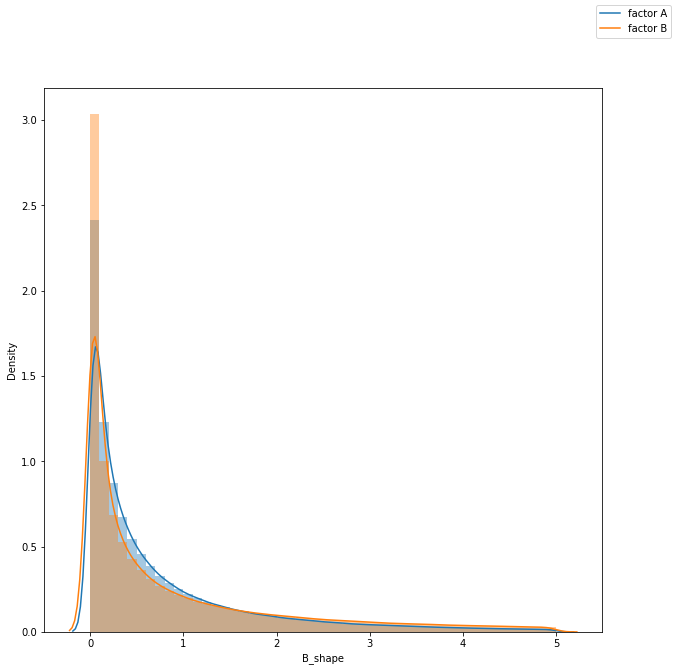

Mean of difference between factor A B is -0.9999561069890461, A mean = 1.0028064198691518, B mean = 1.998854657483655


In [4]:
compare_factors(np.random.exponential)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.05it/s]


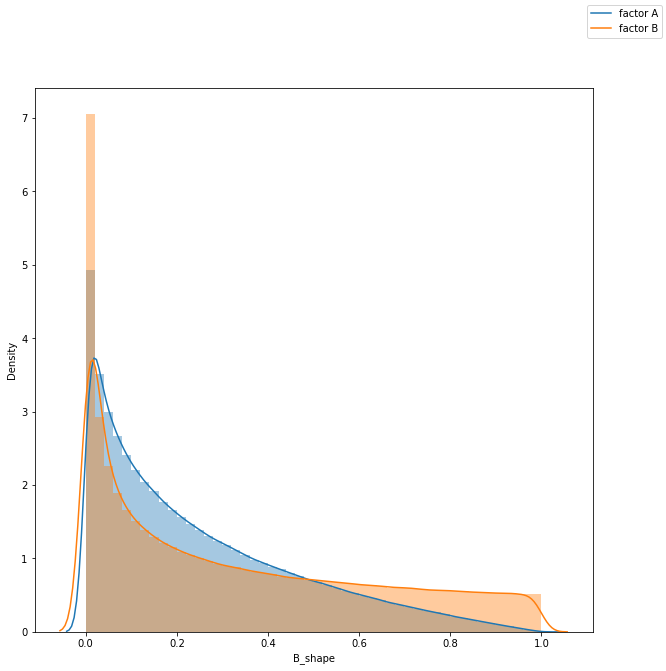

Mean of difference between factor A B is -0.08332561328965742, A mean = 0.24985804915219004, B mean = 0.333747551178944


In [76]:
compare_factors(np.random.uniform)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:20<00:00, 12.49it/s]


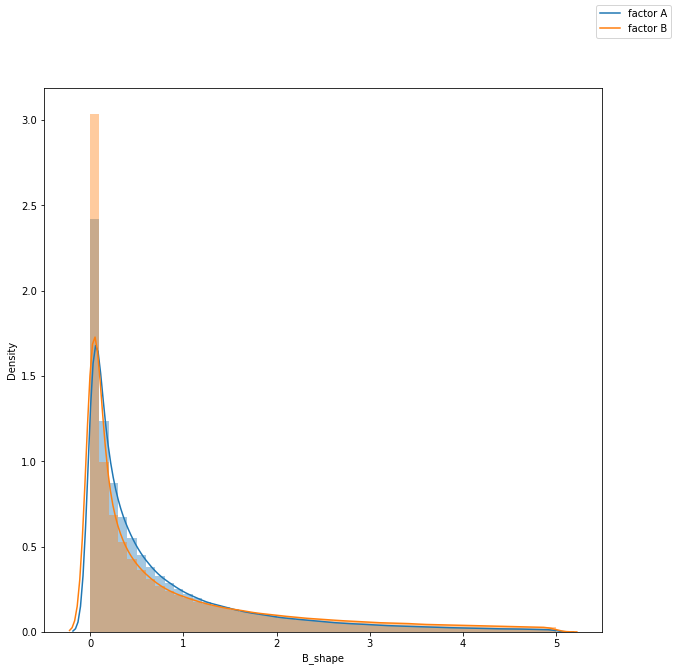

Mean of difference between factor A B is -0.9998775384930536


In [71]:
compare_factors(partial(np.random.gamma, 1))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 32141.98it/s]


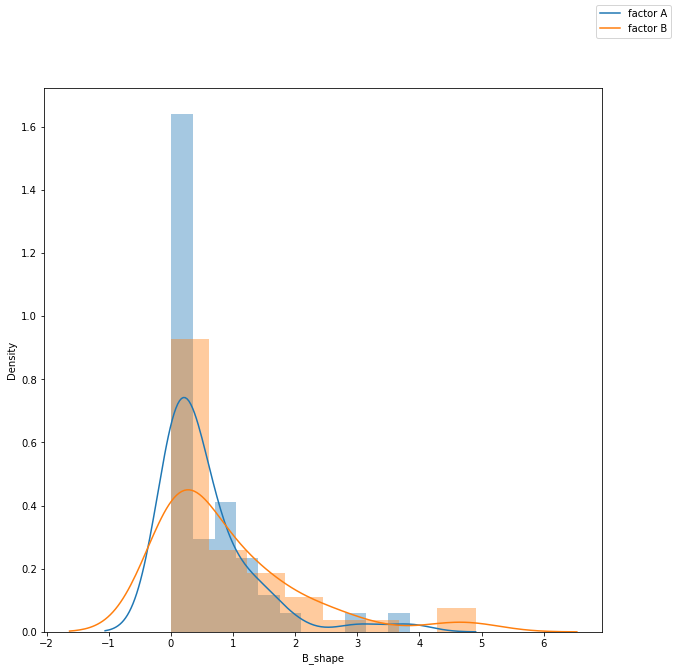

Mean of difference between factor A B is -1.0444155537015574, A mean = 0.6690213138503829, B mean = 2.193000802391756


In [3]:
compare_factors(np.random.exponential, n=50)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 23505.53it/s]


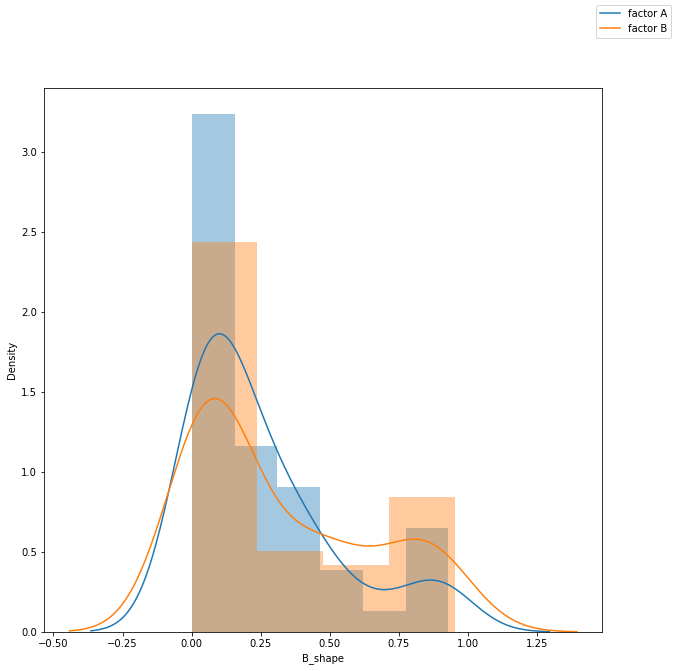

Mean of difference between factor A B is -0.0830717226580722, A mean = 0.2545388430971484, B mean = 0.32419811394132325


In [75]:
compare_factors(np.random.uniform, n=50)

# Q2

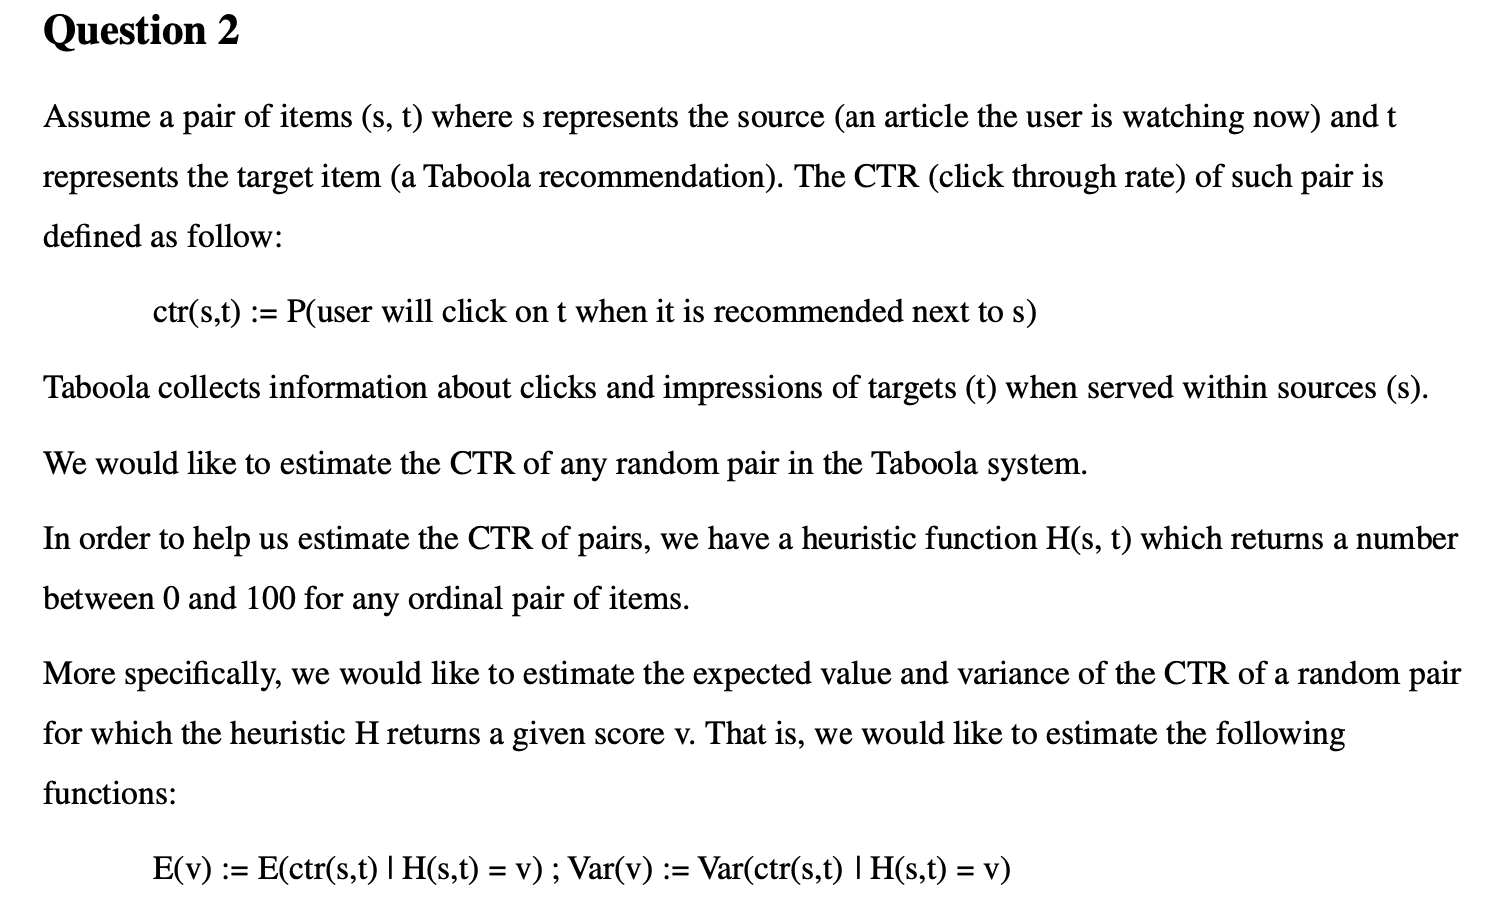

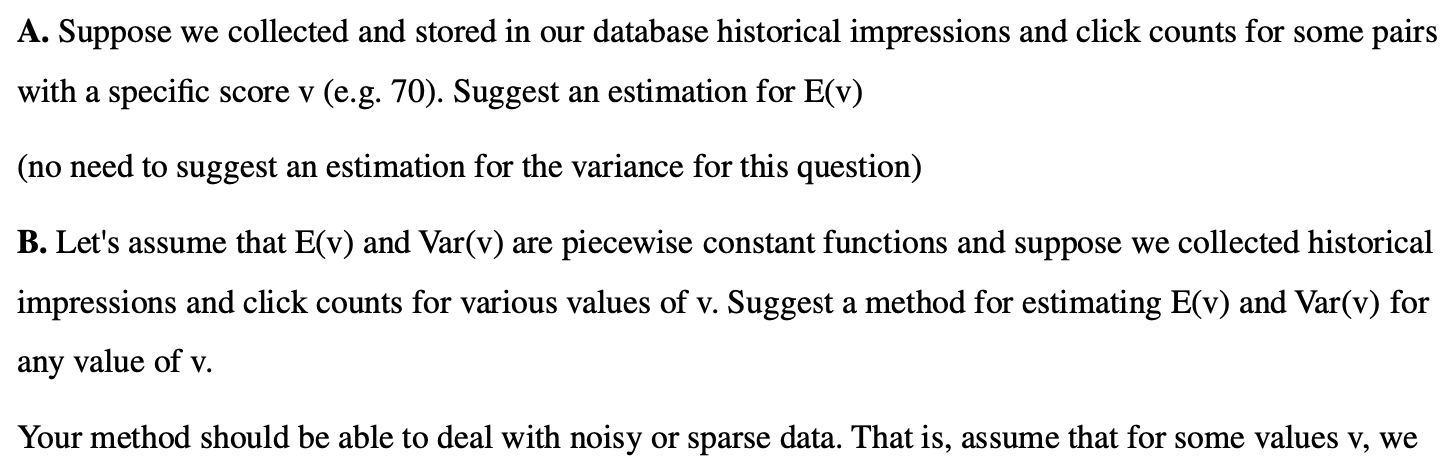

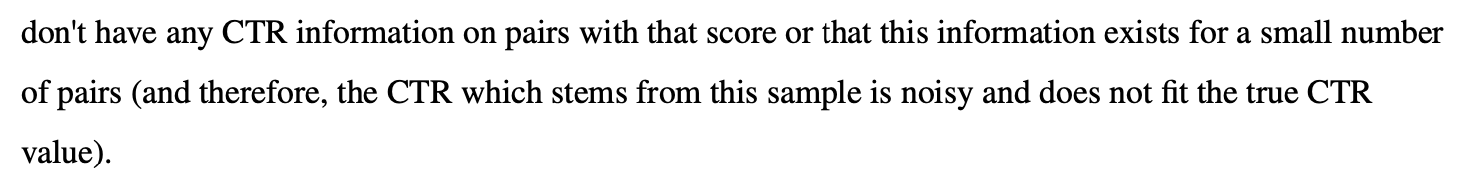

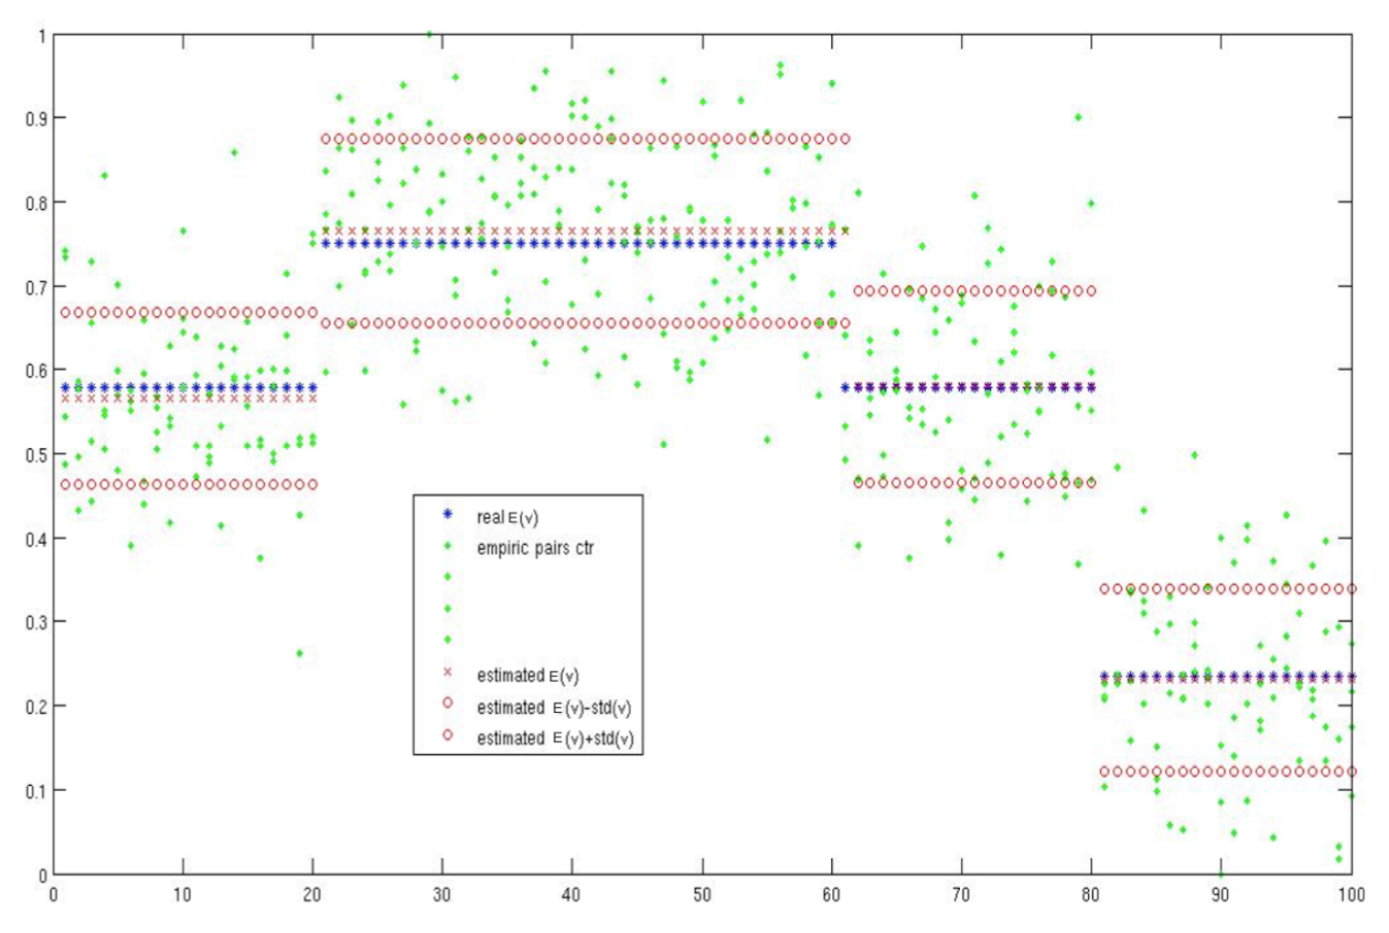

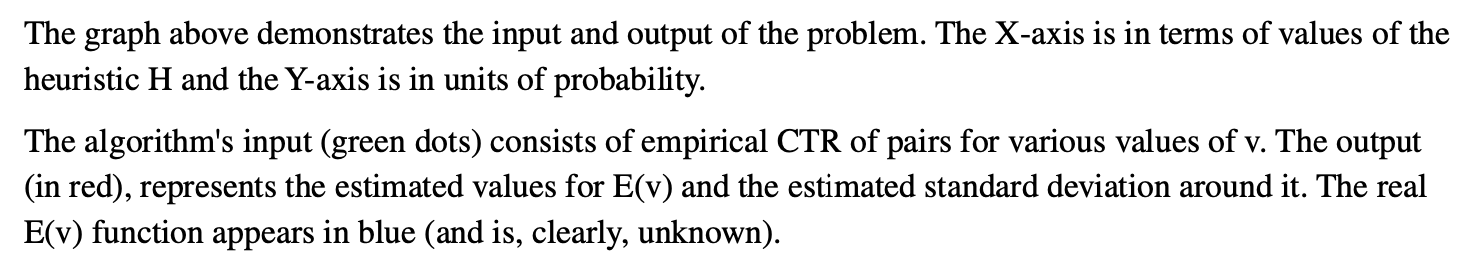

X-axis: heuristic H

Y-axis: units of probability

input: empirical CTR $x = [p, v]$

output: E(v) and Var(v)

## Problem Statement

Given historical empirical CTR of pairs for various values of $v$.

We are going to estimate the following equations:

- Expected value $E(v):=E(ctr(s,t)|H(s,t)=v)$
- Variance $Var(v):=Var(ctr(s,t)|H(s,t)=v)$

Heuristic function $H(s,t)$ generates a number $[0, 100]$.

We have to find the estimated expected values and variances among number $[0, 100]$, while the real $E(v)$ remains unknown.

## Solution

As illustrated in the figure, we can see that there are estimated $E(v)$ to respective heuristic scores.

There are multiple occurrenced $CTR(s,t)$ with specific score, and we can describe probability distribution of $CTR$ in the individual score.

### Example

For instance, given heuristic score $70$ and the empirical $CTR$ values `[0.1, 0.2, 0.2, 0.3, 0.4]`.

We can derive the probability distribution of $CTR$, where $x$ is the probability of $CTR(s, t)$, and $f(x)$ is the value of $CTR(s, t)$:

$x$ | $f(x)$
---|---
$\frac{1}{5}=0.2$ | $0.1$
$\frac{2}{5}=0.4$ | $0.2$
$\frac{1}{5}=0.2$ | $0.3$
$\frac{1}{5}=0.2$ | $0.4$

$E(v) = \int_{0}^{1}x f(x)dx = \mu$

$Var(v) = E(v^2) - E(v)^2 = \int_{0}^{1}x^2 f(x)dx - \mu^2$

In this example, we can derive the expected value and variance:
- $E(70) = 0.2*0.1 + 0.4*0.2 + 0.2*0.3 + 0.2*0.4 = 0.24$
- $Var(70) = (0.2)^2*0.1 + (0.4)^2*0.2 + (0.2)^2*0.3 + (0.2)^2*0.4 - (0.24)^2 = 0.0064$

### Architecture

Along with the example above, we can design a two-layer data structure to store heuristic scores and $CTR$ information.

1. Size 100 of array to store $CTR$ information.
2. Hashmap to store the probability and value of $CTR$.

`X = [map(CTR(s, t)) for i in 100]`

### Question A

In the question A), the value of $E(v)$ with the probability distribution of $CTR$ in value $v$ is estimated.

The estimation procedure is:

1. Calculate the probability of $CTR(s, t)$ in value $v$.
2. Calculate the expected value $E(v)$ with probability of $CTR(s, t)$ and value of $CTR(s, t)$.

The time complexity of the estimation is $O(n)$, and the space complexity is $O(n)$, where $n$ is the size of $CTR$ data.

### Question B

Based on the basic estimation $E(v)$ and $Var(v)$ from question A), we should further consider two scenarios.

1. Noisy Data: Some of the $CTR$ data does not fit the true $CTR$ value.
2. Sparse Data: $CTR$ data is not available in the score $v$.

The estimation procedure is:

1. Filter the noisy $CTR$ data in each score.
2. Calculate the estimated $E(v)$ and $Var(v)$ for all available scores.
3. Generate the missing values of $E(v)$ and $Var(v)$ for the scores without $CTR$ data.
    
#### Noisy Data

If the historical $CTR$ data contains some samples which do not fit the true CTR values, we should stem it from our estimation.

As indicated from the question and the figure, the distribution of $CTR$ should be more close to normal distribution, or more centralized distribution.

For a continuous probability distribution, there are three common strategies for detecting outliers.

1. **Z-score**:
    - In normal distribution, $99.8\%$ of data is in $[\mu - 3\sigma, \mu + 3\sigma]$, and $95.6\%$ of data is in $[\mu - 2\sigma, \mu+2\sigma]$.
    - First shift the distribution to $\mu=0, \sigma=1$ with $Z = \frac{X - \mu}{\sigma}$, and then set the threshold for boundaries $2\sigma$ or $3\sigma$.
2. Inter-Quartile range:
    - For other distributions, we can determine the interquartile range along with the $Q1$ and $Q3$ values for the data.
    - Interquartile range is $Q3 - Q1$, we keep the data ranges $[Q1 - 1.5(Q3 - Q1), Q3 + 1.5(Q3 - Q1)]$, and discard the data outside the range.
3. Percentile:
    - Discard the data under $percentile(1)$ or above $percentile(99)$.
    
In this task, the **Z-score method** is most suggested since the distribution of $CTR$ is closer to normal distribution, and the abnormal data should be excluded with the assumption of normal distribution.

#### Sparse Data

If the historical $CTR$ data does not exist in certain score, we can apply missing value imputation strategies to estimate the missing values.

1. Constant value imputation.
    - Replace $E(v)$ and $Var(v)$ with zero or pre-defined value.
2. **Mean/Median value imputation**.
    - Replace $E(v)$ and $Var(v)$ with mean/median of all available $E(x), Var(x) where x \in [0, 100]$.
3. Most frequent value imputation.
    - Replace $E(v)$ and $Var(v)$ with the most frequent of $E(x), Var(x)$.
4. **Most closest value imputation**.
    - Replace $E(v)$ and $Var(v)$ with the closest $E(x), Var(x)$.
5. **k-NN imputation**.
    - Similar to most closest value imputation, but using k-NN algorithm to find k closest $E(x)$ and $Var(x)$ and get weighed $E(v)$.
    
Intuitively, the distribution of $CTR$ should be close to the one with closest score.

The methods 2, 4, and 5 are most recommended since it can better capture the overall distribution of $E(v)$, and provide an intermediate estimation.

In order to apply a weighed estimation, at first we should know the calculation of $E$ and $Var$.

Assume $X, Y$ are two random variables, $Cov[X,Y]$ is the covariance of $X,Y$.

1. $E$
    - $E[kX] = kE[X], k \in \mathbb{R}$
    - $E[X + c] = E[X]+c, c \in \mathbb{R}$
    - $E[X+Y] = E[X] + E[Y]$
2. $Var$
    - $Var[kX] = k^2Var[X], k \in \mathbb{R}$
    - $Var[X+c] = Var[X], c \in \mathbb{R}$
    - $Var[aX + bY] = a^2 Var[X] + b^2 Var[Y] + 2ab Cov[X,Y], a,b \in \mathbb{R}$
    
The methods can be classified into two categories:

1. Non-Weighed:
    - In this method, the estimated $E(v)$ and $Var(v)$ are acquired by known values of $E$ and $Var$.
    - Methods: median, and most closest value imputation.
2. Weighed:
    - In this method, the estimated $E(v)$ and $Var(v)$ are evaluated using weighed values of $E$ and $Var$.
    - Given $x = [x_1, x_2, ..., x_n]$ for all available estimations.
    - $E(v) = \frac{\sum{E(x)}}{n}$
    - $Var(v) = \frac{\sum{Var(x)}}{n^2}$
    - Methods: mean, and k-NN value imputation.
    
In this task, we would like to approximate the values to their neighborhoods.

Therefore, **k-NN** value imputation is most suggested because it takes more closest scores into account, and the results should be more robust than most closest value imputation.

In [4]:
class Model:
    

0.006400000000000017

# Q3

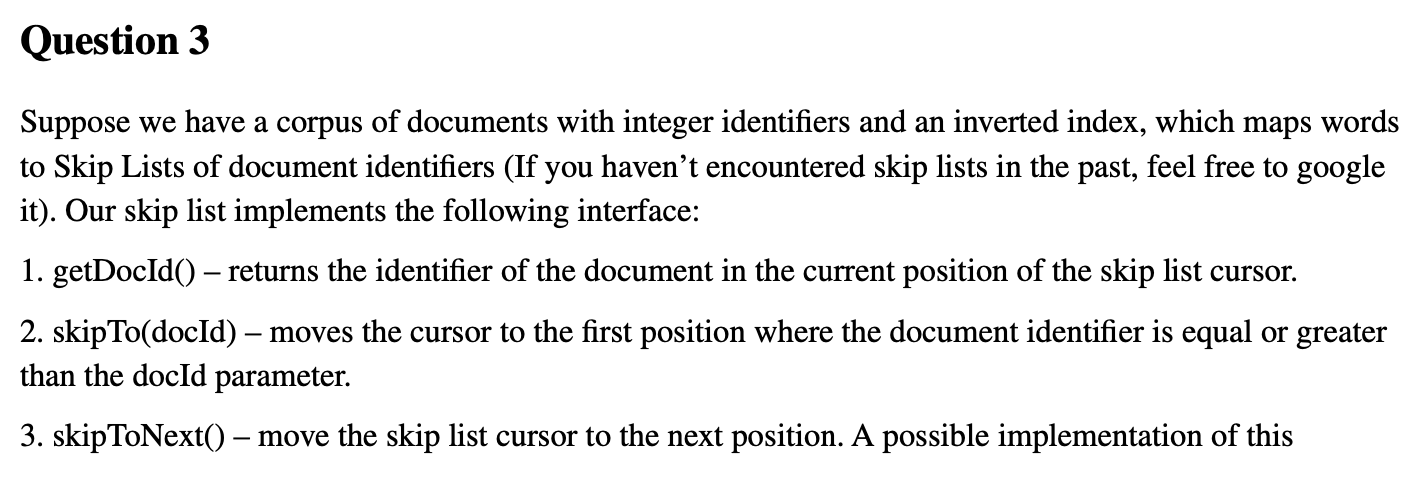

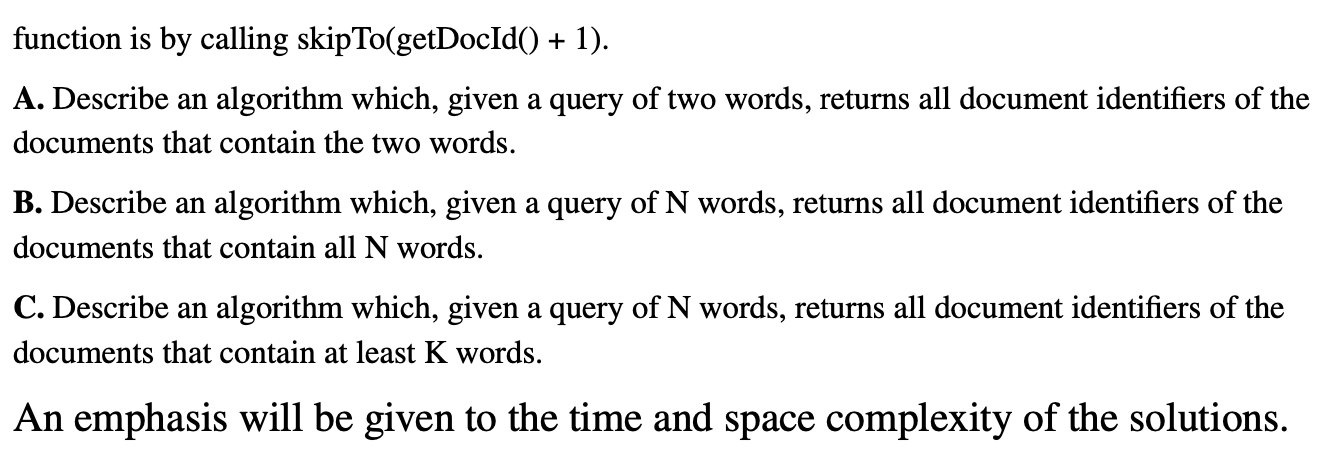

1. What is Skip Lists?
2. What is inverted index?

# Q4

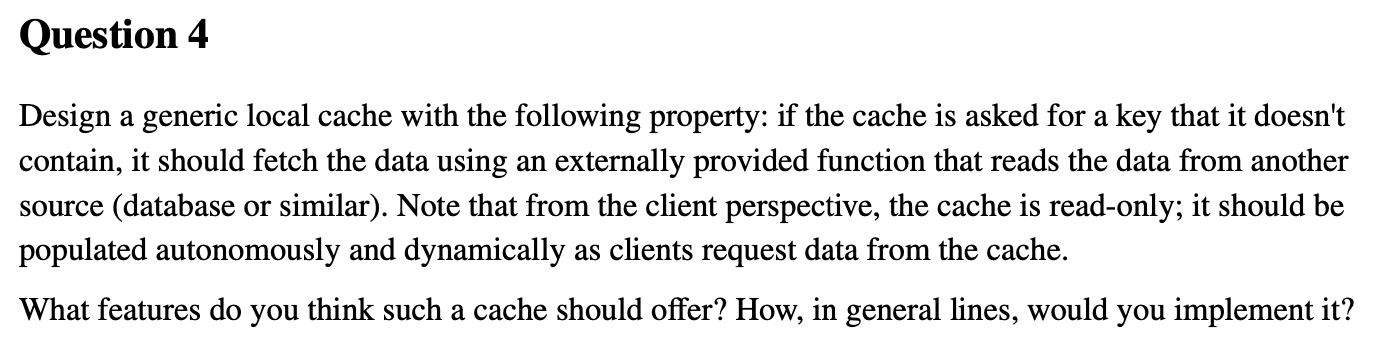

# References

